In [1016]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os
import joblib
import gc
import warnings
import sys
warnings.filterwarnings('ignore')
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras import regularizers
import math
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras import regularizers
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from sklearn.tree import DecisionTreeClassifier
from joblib import parallel_backend
import dill
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import make_scorer
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
import pickle
from sklearn.metrics import confusion_matrix
sb.set()

In [1092]:
time_1=pd.read_csv(r"C:\Users\Admin\Desktop\Labelled_Files\features\time_1.csv")
freq_1=pd.read_csv(r"C:\Users\Admin\Desktop\Labelled_Files\features\freq_1.csv")

combined_1 = pd.concat([time_1, freq_1], axis=1)
combined_1=combined_1[combined_1['0']!=2]
combined_1.dropna(inplace=True)
combined_1

,0,mean_A_F,max_A_F,min_A_F,var_A_F,std_A_F,rms_A_F,mav_A_F,zcr_A_F,p2p_A_F,...,spectral_kurtosis_T_F,bandpower_T_F,PSD_T_V,spectral_spread_T_V,spectral_kurtosis_T_V,bandpower_T_V,PSD_T_L,spectral_spread_T_L,spectral_kurtosis_T_L,bandpower_T_L
1,0,-81.609375,-60,-101,86.831787,9.318358,82.139649,81.609375,0.0,41,...,-1.005635,68.043591,103.023293,8.631511,-0.980758,103.259502,156.967321,8.533258,-1.306431,166.074431
2,0,-79.281250,-60,-111,91.420898,9.561428,79.855729,79.281250,0.0,51,...,-1.093735,80.222481,115.830951,8.645273,-1.169020,120.678765,146.712063,8.272140,-0.550743,139.301759
3,0,-71.718750,-60,-90,70.483398,8.395439,72.208466,71.718750,0.0,30,...,-1.437797,96.606759,124.816338,7.750530,-0.751058,126.137385,131.040499,8.718417,-0.527582,131.276471
4,0,-75.468750,-60,-90,90.405273,9.508169,76.065350,75.468750,0.0,30,...,-0.355220,125.182906,67.544478,7.385990,-0.628379,65.943791,122.189677,8.779241,-0.890623,120.975436
5,0,-78.343750,-50,-101,101.381836,10.068855,78.988132,78.343750,0.0,51,...,-0.483154,117.716211,106.346257,9.921617,-1.412729,107.857780,120.742110,7.700396,-1.065825,125.333720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9188,1,242.250000,2848,-1181,327142.093750,571.963367,621.149866,367.156250,3.0,4029,...,3.584311,14651.951783,21151.398069,6.277861,0.883775,21361.361570,8098.965874,7.657653,0.165531,8014.746988
9189,1,334.640625,2616,-939,300198.136475,547.903401,642.014396,431.171875,2.0,3555,...,17.804934,6753.460860,7302.111771,3.780667,7.219301,7446.247857,2691.128789,7.695633,-0.262886,2824.954003
9190,1,373.515625,3616,-1757,650379.812256,806.461290,888.759661,558.359375,4.0,5373,...,22.147079,8721.484677,7563.168185,4.492189,1.965671,7727.781379,2745.258900,6.347818,3.202689,2665.622007
9191,1,402.265625,4111,-1747,902242.913818,949.864682,1031.533105,621.828125,4.0,5858,...,22.837088,11586.049003,4801.245306,5.257542,8.880867,4621.252143,6055.613588,6.643926,0.842814,6058.026124


In [1093]:
data_array = combined_1.to_numpy()
npy_file = r"C:\Users\Admin\Desktop\experiments\train_data.npy"
np.save(npy_file, data_array)

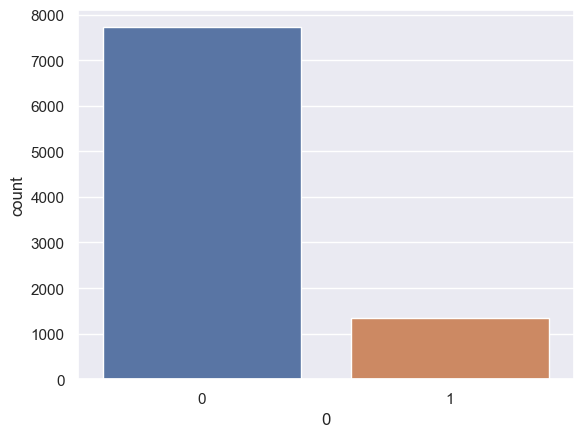

In [1018]:
X = combined_1.drop('0', axis=1)
y = combined_1['0']

sb.countplot(data=pd.DataFrame(y), x='0')
plt.show()

In [1019]:
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

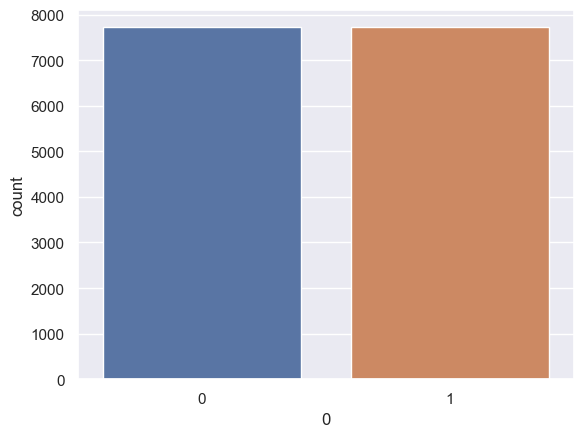

In [1020]:
sb.countplot(data=pd.DataFrame(y), x='0')
plt.show()

In [1021]:
scaler = StandardScaler()

X = scaler.fit_transform(X)

In [1022]:
def getsize(model):
  p = pickle.dumps(model)
  return sys.getsizeof(p)

In [1023]:
# Define custom function for specificity
def specificity_score(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    specificity = tn / (tn+fp)
    return specificity

# Define a custom function that calculates the harmonic mean of sensitivity and specificity
def harmonic_mean(y_true, y_pred):
    sensitivity = recall_score(y_true, y_pred)
    specificity = specificity_score(y_true, y_pred)
    return 2 * (sensitivity * specificity) / (sensitivity + specificity)

# Create a custom scorer
custom_scorer = make_scorer(harmonic_mean, greater_is_better=True)

In [1065]:
dt = DecisionTreeClassifier()

param_grid = {
    'max_depth': [None, 10, 25, 50, 100],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

grid_search = HalvingGridSearchCV(estimator=dt, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1, scoring='f1')

grid_search.fit(X, y)

best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print('Best parameters found: ', best_params)
print('Best estimator found: ', best_estimator)

n_iterations: 5
n_required_iterations: 5
n_possible_iterations: 5
min_resources_: 190
max_resources_: 15444
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 90
n_resources: 190
Fitting 5 folds for each of 90 candidates, totalling 450 fits
----------
iter: 1
n_candidates: 30
n_resources: 570
Fitting 5 folds for each of 30 candidates, totalling 150 fits
----------
iter: 2
n_candidates: 10
n_resources: 1710
Fitting 5 folds for each of 10 candidates, totalling 50 fits
----------
iter: 3
n_candidates: 4
n_resources: 5130
Fitting 5 folds for each of 4 candidates, totalling 20 fits
----------
iter: 4
n_candidates: 2
n_resources: 15390
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Best parameters found:  {'criterion': 'entropy', 'max_depth': 100, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best estimator found:  DecisionTreeClassifier(criterion='entropy', max_depth=100, min_samples_leaf=4,
                       min_samples_split=10)


For Training Data:
Accuracy: 0.9948199948199948
Precision: 0.9959761163032191
Recall: 0.9936544936544937
F1-Score: 0.9948139504732271
Sensitivity: 0.9936544936544937
Specificity: 0.995985495985496


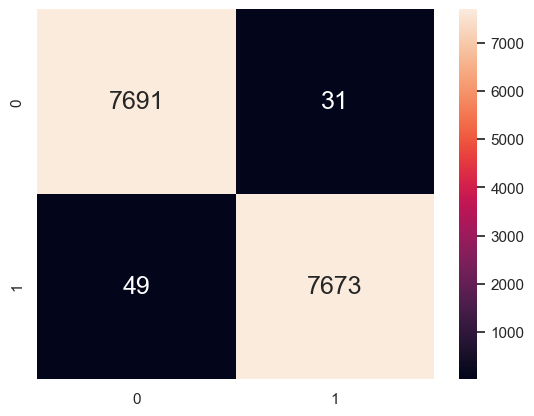

In [1066]:
dt_y_pred = grid_search.predict(X)

tn, fp, fn, tp = confusion_matrix(y, dt_y_pred).ravel()

print("For Training Data:")
print('Accuracy:', accuracy_score(y, dt_y_pred))
print('Precision:', precision_score(y, dt_y_pred))
print('Recall:', recall_score(y, dt_y_pred))
print('F1-Score:', f1_score(y, dt_y_pred))


# Calculate Sensitivity
sensitivity = tp / (tp + fn)

# Calculate Specificity
specificity = tn / (tn + fp)

print(f"Sensitivity: {sensitivity}")
print(f"Specificity: {specificity}")

sb.heatmap(confusion_matrix(y, dt_y_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18})

plt.show()

In [1067]:
getsize(grid_search)

53612

In [1068]:
joblib.dump(grid_search, r"C:\Users\Admin\Desktop\Models\Patient_1_2\dt_new_model_1.joblib")

['C:\\Users\\Admin\\Desktop\\Models\\Patient_1_2\\dt_new_model_1.joblib']

In [1073]:
lgbm = LGBMClassifier()
parameters = {
    'n_estimators': [50, 100, 150],
    'max_depth': [8, 10, 12, 14, 20, None],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.5, 0.7, 1],
    'colsample_bytree': [0.5, 0.7, 1],
}

hgs = HalvingGridSearchCV(lgbm, parameters, cv=5, scoring='f1', n_jobs=-1, verbose=2)

best_lgm_model = hgs.fit(X, y)

print('Best parameters:', best_lgm_model.best_params_)

n_iterations: 6
n_required_iterations: 6
n_possible_iterations: 6
min_resources_: 63
max_resources_: 15444
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 486
n_resources: 63
Fitting 5 folds for each of 486 candidates, totalling 2430 fits
----------
iter: 1
n_candidates: 162
n_resources: 189
Fitting 5 folds for each of 162 candidates, totalling 810 fits
----------
iter: 2
n_candidates: 54
n_resources: 567
Fitting 5 folds for each of 54 candidates, totalling 270 fits
----------
iter: 3
n_candidates: 18
n_resources: 1701
Fitting 5 folds for each of 18 candidates, totalling 90 fits
----------
iter: 4
n_candidates: 6
n_resources: 5103
Fitting 5 folds for each of 6 candidates, totalling 30 fits
----------
iter: 5
n_candidates: 2
n_resources: 15309
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Best parameters: {'colsample_bytree': 0.5, 'learning_rate': 0.2, 'max_depth': None, 'n_estimators': 100, 'subsample': 1}


For Training Data:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0
Sensitivity: 1.0
Specificity: 1.0


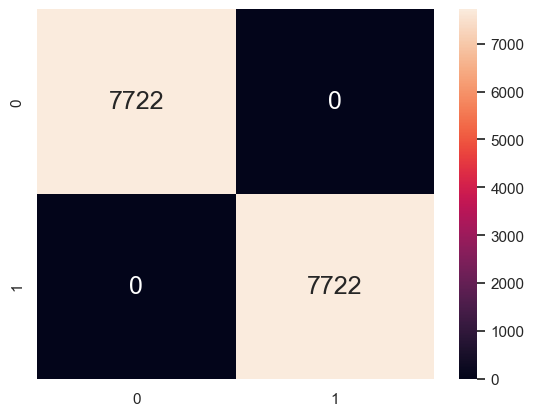

In [1074]:
lgbm_y_pred = best_lgm_model.predict(X)

tn, fp, fn, tp = confusion_matrix(y, lgbm_y_pred).ravel()

print("For Training Data:")
print('Accuracy:', accuracy_score(y, lgbm_y_pred))
print('Precision:', precision_score(y, lgbm_y_pred))
print('Recall:', recall_score(y, lgbm_y_pred))
print('F1-Score:', f1_score(y, lgbm_y_pred))

# Calculate Sensitivity
sensitivity = tp / (tp + fn)

# Calculate Specificity
specificity = tn / (tn + fp)

print(f"Sensitivity: {sensitivity}")
print(f"Specificity: {specificity}")


sb.heatmap(confusion_matrix(y, lgbm_y_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18})

plt.show()

In [1075]:
getsize(best_lgm_model)

543262

In [1076]:
joblib.dump(best_lgm_model, r"C:\Users\Admin\Desktop\Models\Patient_1_2\lgm_new_model.joblib")

['C:\\Users\\Admin\\Desktop\\Models\\Patient_1_2\\lgm_new_model.joblib']

In [1077]:
xgb = XGBClassifier(eval_metric='logloss')

parameters = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 12, 14, 16, 18, 20, 25, None],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.5, 0.7, 1],
    'colsample_bytree': [0.6, 0.8, 1],
#    'min_child_weight': [1, 5, 10],
#    'gamma': [0.5, 1, 1.5],
#    'reg_alpha': [0.1, 0.5, 1],
#    'reg_lambda': [0.1, 0.5, 1]
}

hgs = HalvingGridSearchCV(xgb, parameters, cv=5, scoring='recall', verbose=2, n_jobs=-1)

best_model = hgs.fit(X, y)

print('Best parameters:', best_model.best_params_)

n_iterations: 6
n_required_iterations: 6
n_possible_iterations: 6
min_resources_: 63
max_resources_: 15444
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 648
n_resources: 63
Fitting 5 folds for each of 648 candidates, totalling 3240 fits
----------
iter: 1
n_candidates: 216
n_resources: 189
Fitting 5 folds for each of 216 candidates, totalling 1080 fits
----------
iter: 2
n_candidates: 72
n_resources: 567
Fitting 5 folds for each of 72 candidates, totalling 360 fits
----------
iter: 3
n_candidates: 24
n_resources: 1701
Fitting 5 folds for each of 24 candidates, totalling 120 fits
----------
iter: 4
n_candidates: 8
n_resources: 5103
Fitting 5 folds for each of 8 candidates, totalling 40 fits
----------
iter: 5
n_candidates: 3
n_resources: 15309
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': None, 'n_estimators': 150, 'subsample': 0.7}


For Training Data:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0
Sensitivity: 1.0
Specificity: 1.0


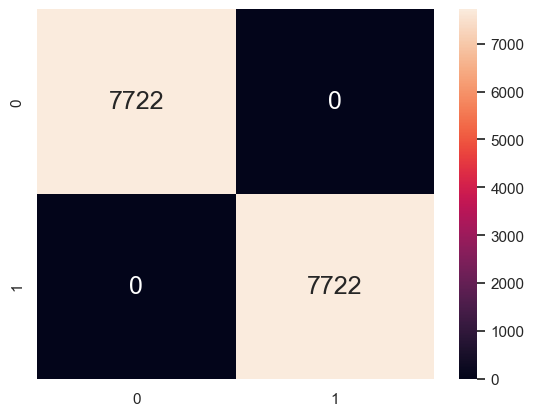

In [1078]:
xgb_y_pred = best_model.predict(X)

tn, fp, fn, tp = confusion_matrix(y, xgb_y_pred).ravel()

print("For Training Data:")
print('Accuracy:', accuracy_score(y, xgb_y_pred))
print('Precision:', precision_score(y, xgb_y_pred))
print('Recall:', recall_score(y, xgb_y_pred))
print('F1-Score:', f1_score(y, xgb_y_pred))

# Calculate Sensitivity
sensitivity = tp / (tp + fn)

# Calculate Specificity
specificity = tn / (tn + fp)

print(f"Sensitivity: {sensitivity}")
print(f"Specificity: {specificity}")


sb.heatmap(confusion_matrix(y, xgb_y_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18})

plt.show()

In [1079]:
getsize(best_model)

605338

In [1080]:
joblib.dump(best_model, r"C:\Users\Admin\Desktop\Models\Patient_1_2\xgb_new_model.joblib")

['C:\\Users\\Admin\\Desktop\\Models\\Patient_1_2\\xgb_new_model.joblib']

In [1081]:
clf = AdaBoostClassifier()

param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': [0.01, 0.1, 1.0]
}

search = HalvingGridSearchCV(estimator=clf, param_grid=param_grid, scoring='f1', factor=2, verbose=2, n_jobs=-1)

search.fit(X, y)

print("Best parameters found: ", search.best_params_)
print("Best score found: ", search.best_score_)

n_iterations: 4
n_required_iterations: 4
n_possible_iterations: 4
min_resources_: 1930
max_resources_: 15444
aggressive_elimination: False
factor: 2
----------
iter: 0
n_candidates: 12
n_resources: 1930
Fitting 5 folds for each of 12 candidates, totalling 60 fits
----------
iter: 1
n_candidates: 6
n_resources: 3860
Fitting 5 folds for each of 6 candidates, totalling 30 fits
----------
iter: 2
n_candidates: 3
n_resources: 7720
Fitting 5 folds for each of 3 candidates, totalling 15 fits
----------
iter: 3
n_candidates: 2
n_resources: 15440
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Best parameters found:  {'learning_rate': 1.0, 'n_estimators': 200}
Best score found:  0.9239800702793499


For Training Data:
Accuracy: 0.9952732452732452
Precision: 0.9931656995486783
Recall: 0.9974099974099974
F1-Score: 0.9952833236415326
Sensitivity: 0.9974099974099974
Specificity: 0.9931364931364931


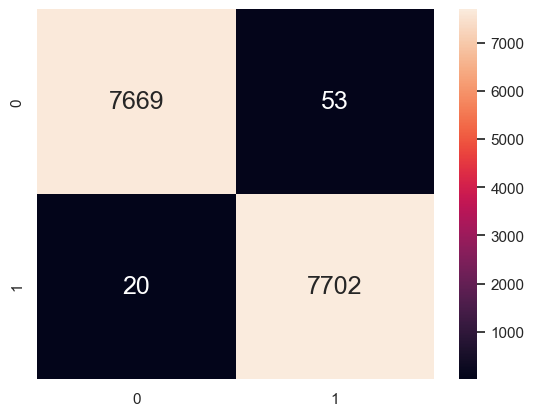

In [1082]:
ada_y_pred = search.predict(X)

tn, fp, fn, tp = confusion_matrix(y, ada_y_pred).ravel()

print("For Training Data:")
print('Accuracy:', accuracy_score(y, ada_y_pred))
print('Precision:', precision_score(y, ada_y_pred))
print('Recall:', recall_score(y, ada_y_pred))
print('F1-Score:', f1_score(y, ada_y_pred))

# Calculate Sensitivity
sensitivity = tp / (tp + fn)

# Calculate Specificity
specificity = tn / (tn + fp)

print(f"Sensitivity: {sensitivity}")
print(f"Specificity: {specificity}")


sb.heatmap(confusion_matrix(y, ada_y_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18})

plt.show()

In [1083]:
getsize(search)

113757

In [1084]:
joblib.dump(search, r"C:\Users\Admin\Desktop\Models\Patient_1_2\ada_new_model.joblib")

['C:\\Users\\Admin\\Desktop\\Models\\Patient_1_2\\ada_new_model.joblib']

In [1085]:
knn = KNeighborsClassifier()

param_grid = {'n_neighbors': list(range(1, 31)),
              'weights': ['uniform', 'distance'],
              'metric': ['euclidean', 'manhattan']}

halving_grid_search = HalvingGridSearchCV(estimator = knn, param_grid = param_grid, cv = 3, verbose=2, n_jobs=-1, scoring='f1')

# Fit the halving grid search model
halving_grid_search.fit(X, y)

print("Best parameters found: ", halving_grid_search.best_params_)
print("Best score found: ", halving_grid_search.best_score_)

n_iterations: 5
n_required_iterations: 5
n_possible_iterations: 5
min_resources_: 190
max_resources_: 15444
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 120
n_resources: 190
Fitting 3 folds for each of 120 candidates, totalling 360 fits
----------
iter: 1
n_candidates: 40
n_resources: 570
Fitting 3 folds for each of 40 candidates, totalling 120 fits
----------
iter: 2
n_candidates: 14
n_resources: 1710
Fitting 3 folds for each of 14 candidates, totalling 42 fits
----------
iter: 3
n_candidates: 5
n_resources: 5130
Fitting 3 folds for each of 5 candidates, totalling 15 fits
----------
iter: 4
n_candidates: 2
n_resources: 15390
Fitting 3 folds for each of 2 candidates, totalling 6 fits
Best parameters found:  {'metric': 'manhattan', 'n_neighbors': 4, 'weights': 'distance'}
Best score found:  0.8198367925156346


For Training Data:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0
Sensitivity: 1.0
Specificity: 1.0


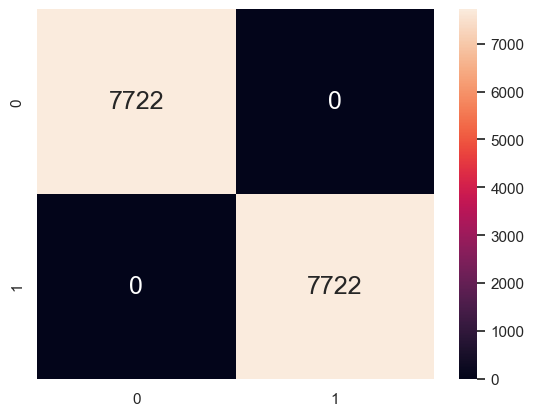

In [1086]:
knn_y_pred = halving_grid_search.predict(X)

tn, fp, fn, tp = confusion_matrix(y, knn_y_pred).ravel()

print("For Training Data:")
print('Accuracy:', accuracy_score(y, knn_y_pred))
print('Precision:', precision_score(y, knn_y_pred))
print('Recall:', recall_score(y, knn_y_pred))
print('F1-Score:', f1_score(y, knn_y_pred))

# Calculate Sensitivity
sensitivity = tp / (tp + fn)

# Calculate Specificity
specificity = tn / (tn + fp)

print(f"Sensitivity: {sensitivity}")
print(f"Specificity: {specificity}")


sb.heatmap(confusion_matrix(y, knn_y_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18})

plt.show()

In [1087]:
getsize(halving_grid_search)

52353603

In [1088]:
joblib.dump(halving_grid_search, r"C:\Users\Admin\Desktop\Models\Patient_1_2\knn_new_model.joblib")

['C:\\Users\\Admin\\Desktop\\Models\\Patient_1_2\\knn_new_model.joblib']

In [663]:
model = tf.keras.Sequential([
    layers.Dense(128, input_shape = (423,), activation='relu') , 
    layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)), 
    layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)),

    layers.Dense(1, activation='linear') 
])

model.compile(loss=BinaryCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01))

model.fit(X,y, epochs=350)

Epoch 1/350
634/634 [==============================] - 3s 4ms/step - loss: 0.4900
Epoch 2/350
634/634 [==============================] - 2s 4ms/step - loss: 0.2011
Epoch 3/350
634/634 [==============================] - 2s 4ms/step - loss: 0.1704
Epoch 4/350
634/634 [==============================] - 2s 4ms/step - loss: 0.1473
Epoch 5/350
634/634 [==============================] - 2s 4ms/step - loss: 0.1261
Epoch 6/350
634/634 [==============================] - 2s 4ms/step - loss: 0.1158
Epoch 7/350
634/634 [==============================] - 2s 4ms/step - loss: 0.1084
Epoch 8/350
634/634 [==============================] - 2s 4ms/step - loss: 0.1126
Epoch 9/350
634/634 [==============================] - 2s 4ms/step - loss: 0.0960
Epoch 10/350
634/634 [==============================] - 2s 4ms/step - loss: 0.0996
Epoch 11/350
634/634 [==============================] - 2s 4ms/step - loss: 0.0786
Epoch 12/350
634/634 [==============================] - 2s 4ms/step - loss: 0.0858
Epoch 13/350


In [668]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

y_pred=sigmoid(model.predict(X))

for i in range(len(y_pred)):
    if y_pred[i]>=0.5:
        y_pred[i]=1
    else:
        y_pred[i]=0

634/634 [==============================] - 1s 2ms/step


634/634 [==============================] - 1s 2ms/step
For Test Data:
Accuracy: 0.9954608249457273
Precision: 0.9959502173054129
Recall: 0.9949674363528715
F1-Score: 0.9954585842630073


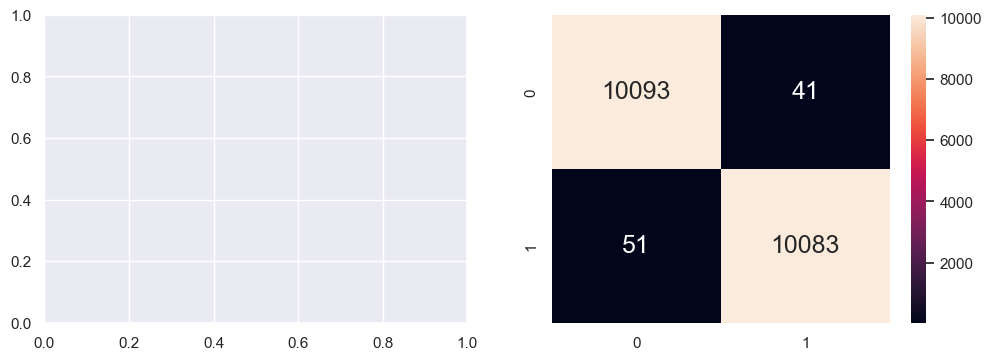

In [669]:
rf_y_test_pred = sigmoid(model.predict(X))

for i in range(len(rf_y_test_pred)):
    if rf_y_test_pred[i]>=0.5:
        rf_y_test_pred[i]=1
    else:
        rf_y_test_pred[i]=0

print("For Test Data:")
print('Accuracy:', accuracy_score(y, rf_y_test_pred))
print('Precision:', precision_score(y, rf_y_test_pred))
print('Recall:', recall_score(y, rf_y_test_pred))
print('F1-Score:', f1_score(y, rf_y_test_pred))

f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y, rf_y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
plt.show()

In [670]:
model.save(r'C:\Users\Admin\Desktop\Models\Patient_8\my_model.h5')

In [671]:
getsize(model)

INFO:tensorflow:Assets written to: ram://82ccc2e3-0a80-4ba4-9246-48037a10268d/assets


205063

In [11]:
time_2=pd.read_csv(r"C:\Users\Admin\Desktop\Labelled_Files\features\time_2.csv")
freq_2=pd.read_csv(r"C:\Users\Admin\Desktop\Labelled_Files\features\freq_2.csv")

combined_2 = pd.concat([time_2, freq_2], axis=1)
combined_2=combined_2[combined_2['0']!=2]
combined_2.dropna(inplace=True)
combined_2

,0,mean_A_F,max_A_F,min_A_F,var_A_F,std_A_F,rms_A_F,mav_A_F,zcr_A_F,p2p_A_F,...,spectral_kurtosis_T_F,bandpower_T_F,PSD_T_V,spectral_spread_T_V,spectral_kurtosis_T_V,bandpower_T_V,PSD_T_L,spectral_spread_T_L,spectral_kurtosis_T_L,bandpower_T_L
1,0,-50.414062,50,-161,1030.008240,32.093741,59.762747,53.695312,3.0,211,...,11.183547,573.953892,742.948584,6.036798,4.254727,386.539979,1445.651261,7.064405,1.795392,729.560771
2,0,-60.570312,20,-151,809.463806,28.451077,66.919553,61.351562,3.0,171,...,2.482700,277.746894,575.276002,7.141522,1.998451,294.194855,953.509169,8.905234,-0.818644,470.935009
3,0,-67.843750,30,-131,731.397461,27.044361,73.035415,68.468750,1.5,161,...,3.529133,339.130801,967.976295,6.407523,4.288678,486.279162,851.908670,10.103918,-1.180781,422.275173
4,0,-80.234375,20,-181,1246.663818,35.308127,87.659676,80.546875,1.0,201,...,13.662192,577.256897,746.706356,5.892599,3.208262,346.636104,1123.929430,8.374498,-0.892639,567.678537
5,0,-85.937500,20,-181,1237.011719,35.171177,92.856156,86.250000,1.0,201,...,2.822576,425.810213,1656.878561,4.681117,7.237065,783.213364,899.290151,8.080388,-1.131364,448.899344
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10942,1,206.671875,2959,-393,109801.861084,331.363639,390.531849,244.609375,3.0,3352,...,3.685523,4605.687116,11879.681329,5.380899,3.137411,6266.845412,5480.937963,8.388439,0.459242,2791.476408
10943,1,219.843750,3212,-353,86467.006836,294.052728,367.148854,245.046875,3.0,3565,...,6.387700,4223.543442,13826.200372,4.706745,3.260161,6686.544807,6030.638460,7.772561,0.243918,3158.263231
10944,1,288.445312,2848,-1181,315804.122009,561.964520,631.668283,399.164062,5.0,4029,...,3.152466,8398.438118,26427.903535,6.707569,0.318474,12959.945923,7732.347773,8.024593,-0.156369,3944.828710
10945,1,387.890625,4111,-1757,776518.003662,881.202589,962.796521,590.093750,8.0,5868,...,9.044716,6584.775160,13789.042777,5.084150,2.497281,6695.225971,8667.012826,7.872043,-0.653135,4277.529343


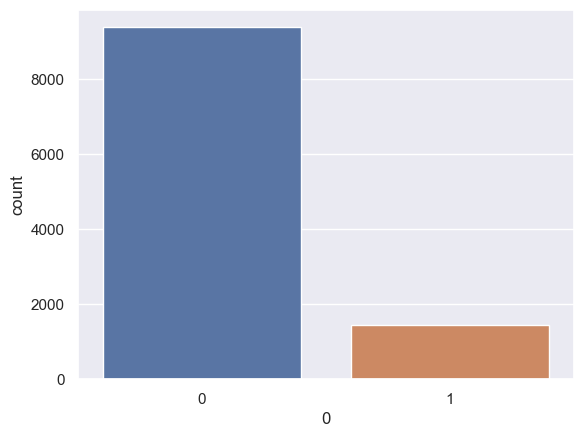

In [12]:
X = combined_2.drop('0', axis=1)
y = combined_2['0']

sb.countplot(data=pd.DataFrame(y), x='0')
plt.show()

In [13]:
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

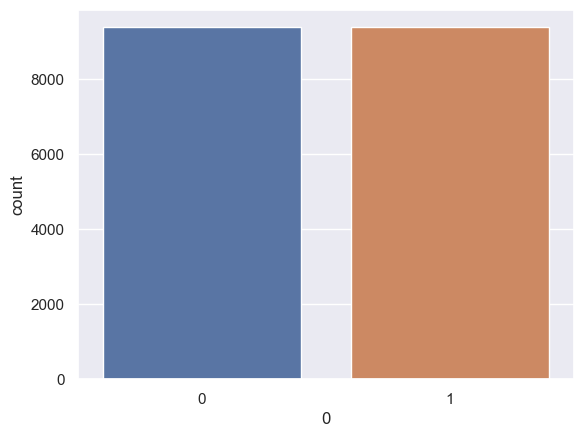

In [14]:
sb.countplot(data=pd.DataFrame(y), x='0')
plt.show()

In [15]:
scaler = StandardScaler()

X = scaler.fit_transform(X)

In [529]:
dt = DecisionTreeClassifier()

param_grid = {
    'max_depth': [None, 10, 50, 100],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

grid_search = HalvingGridSearchCV(estimator=dt, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1, scoring='f1')

grid_search.fit(X, y)

best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print('Best parameters found: ', best_params)
print('Best estimator found: ', best_estimator)

n_iterations: 4
n_required_iterations: 4
n_possible_iterations: 4
min_resources_: 695
max_resources_: 18782
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 72
n_resources: 695
Fitting 5 folds for each of 72 candidates, totalling 360 fits
----------
iter: 1
n_candidates: 24
n_resources: 2085
Fitting 5 folds for each of 24 candidates, totalling 120 fits
----------
iter: 2
n_candidates: 8
n_resources: 6255
Fitting 5 folds for each of 8 candidates, totalling 40 fits
----------
iter: 3
n_candidates: 3
n_resources: 18765
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best parameters found:  {'criterion': 'entropy', 'max_depth': 50, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best estimator found:  DecisionTreeClassifier(criterion='entropy', max_depth=50)


For Training Data:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0
Sensitivity: 1.0
Specificity: 1.0


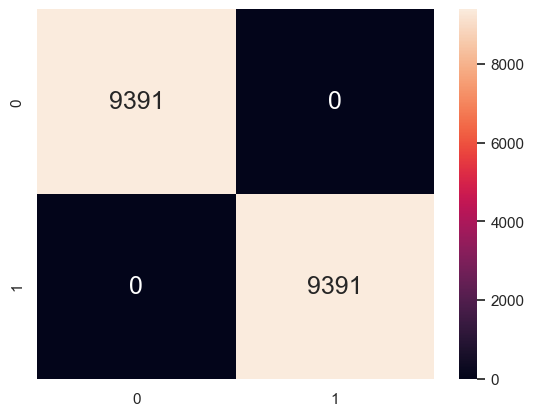

In [530]:
dt_y_pred = grid_search.predict(X)

tn, fp, fn, tp = confusion_matrix(y, dt_y_pred).ravel()

print("For Training Data:")
print('Accuracy:', accuracy_score(y, dt_y_pred))
print('Precision:', precision_score(y, dt_y_pred))
print('Recall:', recall_score(y, dt_y_pred))
print('F1-Score:', f1_score(y, dt_y_pred))


# Calculate Sensitivity
sensitivity = tp / (tp + fn)

# Calculate Specificity
specificity = tn / (tn + fp)

print(f"Sensitivity: {sensitivity}")
print(f"Specificity: {specificity}")

sb.heatmap(confusion_matrix(y, dt_y_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18})

plt.show()

In [531]:
getsize(grid_search)

66487

In [532]:
joblib.dump(grid_search, r"C:\Users\Admin\Desktop\Models\Patient_2\dt_new_model_1.joblib")

['C:\\Users\\Admin\\Desktop\\Models\\Patient_2\\dt_new_model_1.joblib']

In [43]:
lgbm = LGBMClassifier()
parameters = {
    'n_estimators': [50, 100, 150],
    'max_depth': [6, 8, 10, 12, 14, None],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.5, 0.7, 1],
    'colsample_bytree': [0.5, 0.7, 1],
}

hgs = HalvingGridSearchCV(lgbm, parameters, cv=5, scoring='f1', n_jobs=-1, verbose=2)

best_lgm_model = hgs.fit(X, y)

print('Best parameters:', best_lgm_model.best_params_)

n_iterations: 5
n_required_iterations: 6
n_possible_iterations: 5
min_resources_: 77
max_resources_: 18782
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 486
n_resources: 77
Fitting 5 folds for each of 486 candidates, totalling 2430 fits
----------
iter: 1
n_candidates: 162
n_resources: 231
Fitting 5 folds for each of 162 candidates, totalling 810 fits
----------
iter: 2
n_candidates: 54
n_resources: 693
Fitting 5 folds for each of 54 candidates, totalling 270 fits
----------
iter: 3
n_candidates: 18
n_resources: 2079
Fitting 5 folds for each of 18 candidates, totalling 90 fits
----------
iter: 4
n_candidates: 6
n_resources: 6237
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters: {'colsample_bytree': 0.5, 'learning_rate': 0.2, 'max_depth': 8, 'n_estimators': 150, 'subsample': 1}


For Training Data:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0
Sensitivity: 1.0
Specificity: 1.0


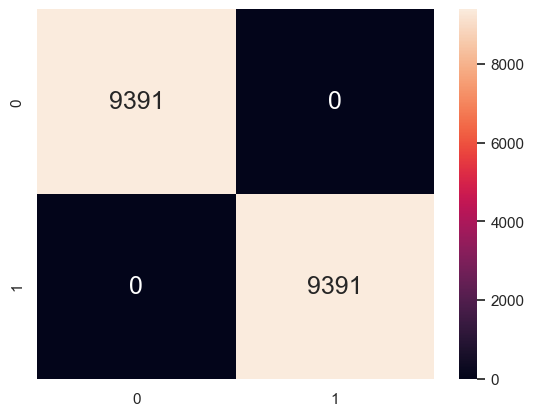

In [44]:
lgbm_y_pred = best_lgm_model.predict(X)

tn, fp, fn, tp = confusion_matrix(y, lgbm_y_pred).ravel()

print("For Training Data:")
print('Accuracy:', accuracy_score(y, lgbm_y_pred))
print('Precision:', precision_score(y, lgbm_y_pred))
print('Recall:', recall_score(y, lgbm_y_pred))
print('F1-Score:', f1_score(y, lgbm_y_pred))

# Calculate Sensitivity
sensitivity = tp / (tp + fn)

# Calculate Specificity
specificity = tn / (tn + fp)

print(f"Sensitivity: {sensitivity}")
print(f"Specificity: {specificity}")


sb.heatmap(confusion_matrix(y, lgbm_y_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18})

plt.show()

In [45]:
getsize(best_lgm_model)

718158

In [46]:
joblib.dump(best_lgm_model, r"C:\Users\Admin\Desktop\Models\Patient_2\lgm_new_model_1.joblib")

['C:\\Users\\Admin\\Desktop\\Models\\Patient_2\\lgm_new_model_1.joblib']

In [662]:
xgb = XGBClassifier(eval_metric='logloss')

parameters = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [10, 12, 14, 16, 18, 20, 25, None],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.5, 0.7, 1],
    'colsample_bytree': [0.6, 0.8, 1],
#    'min_child_weight': [1, 5, 10],
#    'gamma': [0.5, 1, 1.5],
#    'reg_alpha': [0.1, 0.5, 1],
#    'reg_lambda': [0.1, 0.5, 1]
}

hgs = HalvingGridSearchCV(xgb, parameters, cv=5, scoring='f1', verbose=2, n_jobs=-1)

best_model = hgs.fit(X, y)

print('Best parameters:', best_model.best_params_)

n_iterations: 7
n_required_iterations: 7
n_possible_iterations: 7
min_resources_: 25
max_resources_: 18782
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 864
n_resources: 25
Fitting 5 folds for each of 864 candidates, totalling 4320 fits
----------
iter: 1
n_candidates: 288
n_resources: 75
Fitting 5 folds for each of 288 candidates, totalling 1440 fits
----------
iter: 2
n_candidates: 96
n_resources: 225
Fitting 5 folds for each of 96 candidates, totalling 480 fits
----------
iter: 3
n_candidates: 32
n_resources: 675
Fitting 5 folds for each of 32 candidates, totalling 160 fits
----------
iter: 4
n_candidates: 11
n_resources: 2025
Fitting 5 folds for each of 11 candidates, totalling 55 fits
----------
iter: 5
n_candidates: 4
n_resources: 6075
Fitting 5 folds for each of 4 candidates, totalling 20 fits
----------
iter: 6
n_candidates: 2
n_resources: 18225
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Best parameters: {'colsample_bytree': 1, 'learn

For Training Data:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0
Sensitivity: 1.0
Specificity: 1.0


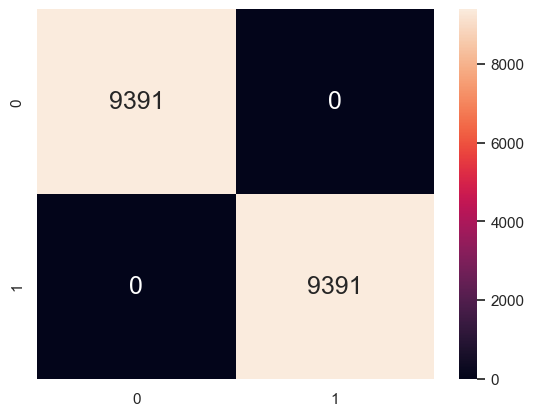

In [663]:
xgb_y_pred = best_model.predict(X)

tn, fp, fn, tp = confusion_matrix(y, xgb_y_pred).ravel()

print("For Training Data:")
print('Accuracy:', accuracy_score(y, xgb_y_pred))
print('Precision:', precision_score(y, xgb_y_pred))
print('Recall:', recall_score(y, xgb_y_pred))
print('F1-Score:', f1_score(y, xgb_y_pred))

# Calculate Sensitivity
sensitivity = tp / (tp + fn)

# Calculate Specificity
specificity = tn / (tn + fp)

print(f"Sensitivity: {sensitivity}")
print(f"Specificity: {specificity}")


sb.heatmap(confusion_matrix(y, xgb_y_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18})

plt.show()

In [664]:
getsize(best_model)

719990

In [665]:
joblib.dump(best_model, r"C:\Users\Admin\Desktop\Models\Patient_2\xgb_new_model_1.joblib")

['C:\\Users\\Admin\\Desktop\\Models\\Patient_2\\xgb_new_model_1.joblib']

In [629]:
svc = SVC()

param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 

halving_grid_search = HalvingGridSearchCV(estimator = svc, param_grid = param_grid, scoring='f1', cv = 3, verbose=2, n_jobs=-1)

halving_grid_search.fit(X, y)

print("Best parameters found: ", halving_grid_search.best_params_)
print("Best score found: ", halving_grid_search.best_score_)

n_iterations: 3
n_required_iterations: 3
n_possible_iterations: 3
min_resources_: 2086
max_resources_: 18782
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 25
n_resources: 2086
Fitting 3 folds for each of 25 candidates, totalling 75 fits
----------
iter: 1
n_candidates: 9
n_resources: 6258
Fitting 3 folds for each of 9 candidates, totalling 27 fits
----------
iter: 2
n_candidates: 3
n_resources: 18774
Fitting 3 folds for each of 3 candidates, totalling 9 fits
Best parameters found:  {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
Best score found:  0.9852496474777036


For Training Data:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0
Sensitivity: 1.0
Specificity: 1.0


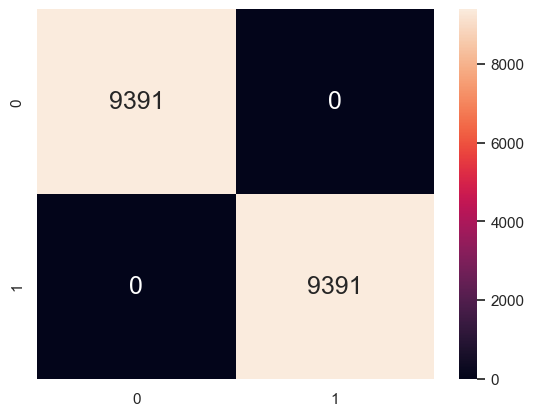

In [630]:
svc_y_pred = halving_grid_search.predict(X)

tn, fp, fn, tp = confusion_matrix(y, svc_y_pred).ravel()

print("For Training Data:")
print('Accuracy:', accuracy_score(y, svc_y_pred))
print('Precision:', precision_score(y, svc_y_pred))
print('Recall:', recall_score(y, svc_y_pred))
print('F1-Score:', f1_score(y, svc_y_pred))

# Calculate Sensitivity
sensitivity = tp / (tp + fn)

# Calculate Specificity
specificity = tn / (tn + fp)

print(f"Sensitivity: {sensitivity}")
print(f"Specificity: {specificity}")


sb.heatmap(confusion_matrix(y, svc_y_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18})

plt.show()

In [631]:
getsize(halving_grid_search)

14544545

In [632]:
joblib.dump(halving_grid_search, r"C:\Users\Admin\Desktop\Models\Patient_2\svc_new_model_1.joblib")

['C:\\Users\\Admin\\Desktop\\Models\\Patient_2\\svc_new_model_1.joblib']

In [633]:
knn = KNeighborsClassifier()

param_grid = {'n_neighbors': list(range(1, 31)),
              'weights': ['uniform', 'distance'],
              'metric': ['euclidean', 'manhattan']}

halving_grid_search = HalvingGridSearchCV(estimator = knn, param_grid = param_grid, cv = 3, verbose=2, n_jobs=-1, scoring='f1')

# Fit the halving grid search model
halving_grid_search.fit(X, y)

print("Best parameters found: ", halving_grid_search.best_params_)
print("Best score found: ", halving_grid_search.best_score_)

n_iterations: 5
n_required_iterations: 5
n_possible_iterations: 5
min_resources_: 231
max_resources_: 18782
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 120
n_resources: 231
Fitting 3 folds for each of 120 candidates, totalling 360 fits
----------
iter: 1
n_candidates: 40
n_resources: 693
Fitting 3 folds for each of 40 candidates, totalling 120 fits
----------
iter: 2
n_candidates: 14
n_resources: 2079
Fitting 3 folds for each of 14 candidates, totalling 42 fits
----------
iter: 3
n_candidates: 5
n_resources: 6237
Fitting 3 folds for each of 5 candidates, totalling 15 fits
----------
iter: 4
n_candidates: 2
n_resources: 18711
Fitting 3 folds for each of 2 candidates, totalling 6 fits
Best parameters found:  {'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'distance'}
Best score found:  0.9883315267819931


For Training Data:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0
Sensitivity: 1.0
Specificity: 1.0


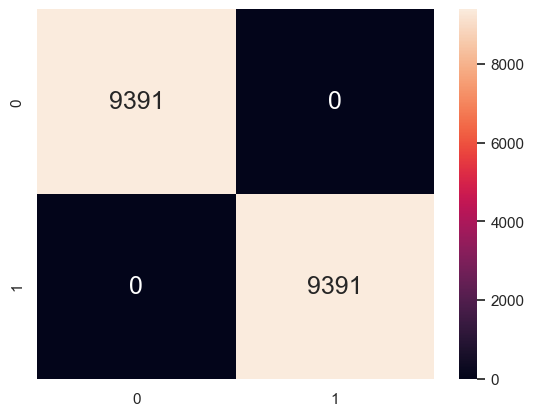

In [634]:
knn_y_pred = halving_grid_search.predict(X)

tn, fp, fn, tp = confusion_matrix(y, knn_y_pred).ravel()

print("For Training Data:")
print('Accuracy:', accuracy_score(y, knn_y_pred))
print('Precision:', precision_score(y, knn_y_pred))
print('Recall:', recall_score(y, knn_y_pred))
print('F1-Score:', f1_score(y, knn_y_pred))

# Calculate Sensitivity
sensitivity = tp / (tp + fn)

# Calculate Specificity
specificity = tn / (tn + fp)

print(f"Sensitivity: {sensitivity}")
print(f"Specificity: {specificity}")


sb.heatmap(confusion_matrix(y, knn_y_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18})

plt.show()

In [635]:
getsize(halving_grid_search)

63662711

In [636]:
joblib.dump(halving_grid_search, r"C:\Users\Admin\Desktop\Models\Patient_2\knn_new_model_1.joblib")

['C:\\Users\\Admin\\Desktop\\Models\\Patient_2\\knn_new_model_1.joblib']

In [637]:
time_3=pd.read_csv(r"C:\Users\Admin\Desktop\Labelled_Files\features\time_3.csv")
freq_3=pd.read_csv(r"C:\Users\Admin\Desktop\Labelled_Files\features\freq_3.csv")

combined_3 = pd.concat([time_3, freq_3], axis=1)
combined_3=combined_3[combined_3['0']!=2]
combined_3

,0,mean_A_F,max_A_F,min_A_F,var_A_F,std_A_F,rms_A_F,mav_A_F,zcr_A_F,p2p_A_F,...,spectral_kurtosis_T_F,bandpower_T_F,PSD_T_V,spectral_spread_T_V,spectral_kurtosis_T_V,bandpower_T_V,PSD_T_L,spectral_spread_T_L,spectral_kurtosis_T_L,bandpower_T_L
0,0,-49.437500,90,-121,1209.329427,34.775414,60.443327,53.916667,6.0,211,...,10.257924,833.016281,1191.217356,6.036759,3.013298,397.003852,1244.931971,8.041625,0.019309,433.794333
1,0,-57.843750,40,-161,984.183919,31.371706,65.803369,59.302083,5.0,201,...,6.292304,493.019052,889.524049,6.235764,3.018069,295.471347,1929.673035,8.734565,-0.187610,648.882331
2,0,-72.317708,30,-141,811.893853,28.493751,77.728661,72.734375,1.5,171,...,4.091930,391.152492,2020.990229,5.389589,5.426900,672.950878,1296.132606,9.425107,-0.926815,429.849209
3,0,-83.692708,20,-181,1380.889947,37.160328,91.571608,84.109375,2.0,201,...,3.915628,593.804896,2826.795184,4.933615,3.587583,921.899609,1492.728874,8.042186,-0.977538,486.233345
4,0,-90.442708,-20,-151,598.267551,24.459508,93.691787,90.442708,0.0,131,...,6.013685,919.697596,1835.957504,6.512873,3.535784,611.351841,1751.934478,7.033470,0.224405,592.325000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10840,1,257.619792,3242,-1959,315745.475233,561.912338,618.153243,365.578125,10.0,5201,...,2.919571,19241.091172,72907.242060,6.364563,0.404921,24139.102691,16861.084492,7.350087,-0.483145,5720.922839
10841,1,214.968750,4000,-2151,256264.957357,506.226192,549.978655,301.114583,6.0,6151,...,6.527431,7759.908459,13561.662302,5.890780,0.897129,4539.412393,4339.312279,7.758583,1.546388,1449.449599
10842,1,222.692708,3212,-353,59900.160780,244.745093,330.896061,239.598958,4.0,3565,...,6.914014,3714.831533,20074.100132,4.568814,6.139686,7008.666499,11691.831277,7.634886,-0.192796,4009.335403
10843,1,316.802083,3616,-1757,428937.564996,654.933252,727.530841,452.229167,9.0,5373,...,9.969767,8261.370250,25528.790748,5.519369,2.698032,8775.865858,10050.997343,7.783204,-0.428308,3406.088729


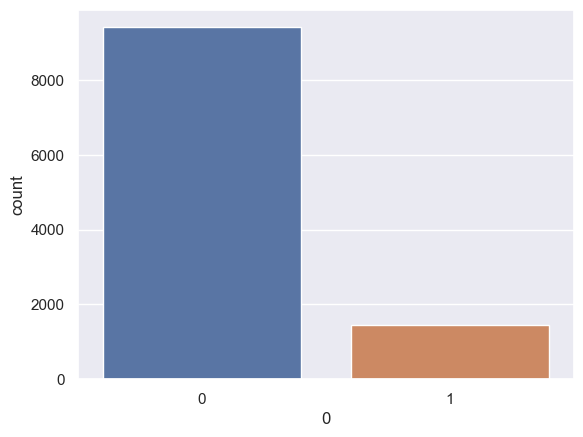

In [638]:
X = combined_3.drop('0', axis=1)
y = combined_3['0']

sb.countplot(data=pd.DataFrame(y), x='0')
plt.show()

In [639]:
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

ValueError: Input X contains NaN.
SMOTE does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
sb.countplot(data=pd.DataFrame(y), x='0')
plt.show()

In [ ]:
scaler = StandardScaler()

X = scaler.fit_transform(X)

In [ ]:
dt = DecisionTreeClassifier()

param_grid = {
    'max_depth': [None, 10, 50, 100],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

grid_search = HalvingGridSearchCV(estimator=dt, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1, scoring='f1')

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print('Best parameters found: ', best_params)
print('Best estimator found: ', best_estimator)

In [ ]:
dt_y_train_pred = grid_search.predict(X_train)

tn, fp, fn, tp = confusion_matrix(y_train, dt_y_train_pred).ravel()

print("For Training Data:")
print('Accuracy:', accuracy_score(y_train, dt_y_train_pred))
print('Precision:', precision_score(y_train, dt_y_train_pred))
print('Recall:', recall_score(y_train, dt_y_train_pred))
print('F1-Score:', f1_score(y_train, dt_y_train_pred))

rf_train_acc=accuracy_score(y_train, dt_y_train_pred)
rf_train_pre=precision_score(y_train, dt_y_train_pred)
rf_train_rec=recall_score(y_train, dt_y_train_pred)
rf_train_f1=f1_score(y_train, dt_y_train_pred)

# Calculate Sensitivity
sensitivity = tp / (tp + fn)

# Calculate Specificity
specificity = tn / (tn + fp)

print(f"Sensitivity: {sensitivity}")
print(f"Specificity: {specificity}")

print()

dt_y_test_pred = grid_search.predict(X_test)

tn, fp, fn, tp = confusion_matrix(y_test, dt_y_test_pred).ravel()

print("For Test Data:")
print('Accuracy:', accuracy_score(y_test, dt_y_test_pred))
print('Precision:', precision_score(y_test, dt_y_test_pred))
print('Recall:', recall_score(y_test, dt_y_test_pred))
print('F1-Score:', f1_score(y_test, dt_y_test_pred))

rf_test_acc=accuracy_score(y_train, dt_y_train_pred)
rf_test_pre=precision_score(y_train, dt_y_train_pred)
rf_test_rec=recall_score(y_train, dt_y_train_pred)
rf_test_f1=f1_score(y_train, dt_y_train_pred)

# Calculate Sensitivity
sensitivity = tp / (tp + fn)

# Calculate Specificity
specificity = tn / (tn + fp)

print(f"Sensitivity: {sensitivity}")
print(f"Specificity: {specificity}")

print()

f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, dt_y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, dt_y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
plt.show()

In [ ]:
getsize(grid_search)

In [ ]:
joblib.dump(grid_search, r"C:\Users\Admin\Desktop\Models\Patient_2\dt_new_model_2.joblib")

In [ ]:
lgbm = LGBMClassifier()
parameters = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [6, 8, 10, 12, 14, 16, 18, 20, None],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.5, 0.7, 1],
    'colsample_bytree': [0.5, 0.7, 1],
}

hgs = HalvingGridSearchCV(lgbm, parameters, cv=5, scoring='f1', n_jobs=-1, verbose=2)

best_lgm_model = hgs.fit(X_train, y_train)

print('Best parameters:', best_lgm_model.best_params_)

In [ ]:
lgbm_y_train_pred = best_lgm_model.predict(X_train)

tn, fp, fn, tp = confusion_matrix(y_train, lgbm_y_train_pred).ravel()

print("For Training Data:")
print('Accuracy:', accuracy_score(y_train, lgbm_y_train_pred))
print('Precision:', precision_score(y_train, lgbm_y_train_pred))
print('Recall:', recall_score(y_train, lgbm_y_train_pred))
print('F1-Score:', f1_score(y_train, lgbm_y_train_pred))

# Calculate Sensitivity
sensitivity = tp / (tp + fn)

# Calculate Specificity
specificity = tn / (tn + fp)

print(f"Sensitivity: {sensitivity}")
print(f"Specificity: {specificity}")

print()

lgbm_y_test_pred = best_lgm_model.predict(X_test)

tn, fp, fn, tp = confusion_matrix(y_test, lgbm_y_test_pred).ravel()

print("For Test Data:")
print('Accuracy:', accuracy_score(y_test, lgbm_y_test_pred))
print('Precision:', precision_score(y_test, lgbm_y_test_pred))
print('Recall:', recall_score(y_test, lgbm_y_test_pred))
print('F1-Score:', f1_score(y_test, lgbm_y_test_pred))


# Calculate Sensitivity
sensitivity = tp / (tp + fn)

# Calculate Specificity
specificity = tn / (tn + fp)

print(f"Sensitivity: {sensitivity}")
print(f"Specificity: {specificity}")

print()

f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, lgbm_y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, lgbm_y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
plt.show()

In [ ]:
getsize(best_lgm_model)

In [ ]:
joblib.dump(best_lgm_model, r"C:\Users\Admin\Desktop\Models\Patient_2\lgm_new_model_2.joblib")

In [211]:
time_4=pd.read_csv(r"C:\Users\Admin\Desktop\Labelled_Files\features\time_4.csv")
freq_4=pd.read_csv(r"C:\Users\Admin\Desktop\Labelled_Files\features\freq_4.csv")

combined_4 = pd.concat([time_4, freq_4], axis=1)
combined_4=combined_4[combined_4['0']!=2]
combined_4

,0,mean_A_F,max_A_F,min_A_F,var_A_F,std_A_F,rms_A_F,mav_A_F,zcr_A_F,mean_A_V,...,ENt_T_L,peak_A_F,peak_A_V,peak_A_L,peak_L_F,peak_L_V,peak_L_L,peak_T_F,peak_T_V,peak_T_L
0,0,-50.175781,90,-161,1230.887070,35.084000,61.224963,54.238281,8.0,990.007812,...,4.091580,146.200374,20.868415,42.680194,1254.653165,21.406355,70.985272,223.571306,35.183787,57.220186
1,0,-64.207031,30,-151,783.656357,27.993863,70.044266,64.910156,5.0,990.339844,...,4.221583,58.149955,21.018384,42.389059,306.610679,14.663687,48.816071,44.755281,45.401767,39.928246
2,0,-83.085938,20,-181,1249.969177,35.354903,90.295305,83.398438,2.0,997.089844,...,4.419747,321.022851,30.721405,39.526208,2074.636919,48.933490,73.154893,89.428789,165.880517,18.582503
3,0,-89.230469,-20,-151,573.247665,23.942591,92.386818,89.230469,0.0,986.742188,...,4.177780,58.915787,24.686857,191.636920,282.082723,13.838828,114.220573,333.284716,95.306759,44.900720
4,0,-76.101562,60,-212,745.403748,27.302083,80.850798,76.960938,2.0,985.609375,...,4.121109,43.713979,8.951603,20.869761,245.949335,7.446249,66.117817,80.106269,21.922348,44.922931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12075,1,328.222656,5121,-2727,370299.055893,608.522026,691.396535,435.128906,10.5,990.707031,...,4.047900,12986.150021,16501.232157,5623.437210,11504.560055,1245.971152,3813.175101,1792.708754,688.634522,1340.138156
12076,1,298.464844,3242,-1959,187980.436264,433.567107,526.366507,361.847656,7.0,981.425781,...,4.445951,9754.295089,9979.685726,4061.668938,12795.353296,1012.226430,8121.865603,752.610126,1553.457027,112.593972
12077,1,206.660156,4000,-2151,241830.888412,491.763041,533.422261,288.855469,9.0,1019.484375,...,3.928866,15521.002964,5181.441351,3958.892886,6050.295583,361.850844,4847.160958,1131.475224,1439.748901,409.120598
12078,1,227.582031,3212,-1181,126782.360458,356.065107,422.582467,271.488281,7.0,1024.222656,...,4.050248,4293.518075,1943.258183,1917.892132,3683.381722,899.308911,3386.028923,565.948999,1180.913864,582.929931


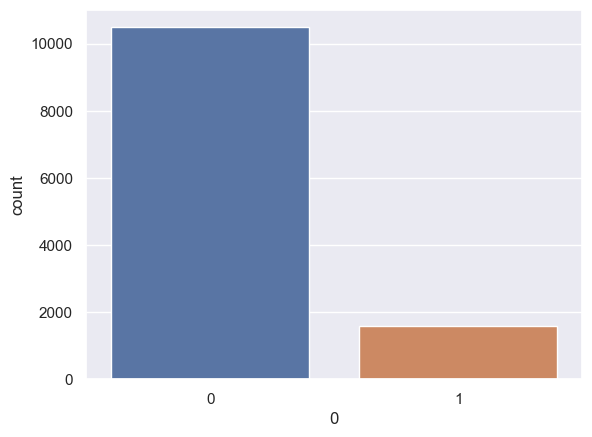

In [212]:
X = combined_4.drop('0', axis=1)
y = combined_4['0']

sb.countplot(data=pd.DataFrame(y), x='0')
plt.show()

In [213]:
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

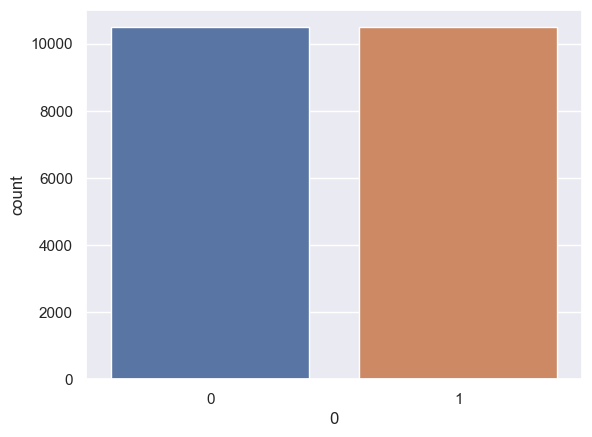

In [214]:
sb.countplot(data=pd.DataFrame(y), x='0')
plt.show()

In [215]:
scaler = StandardScaler()

X = scaler.fit_transform(X)

In [216]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state=42)

In [217]:
rf = RandomForestClassifier(random_state=42)

params = {
    'n_estimators': [50 ,100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2 ,5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

search = HalvingGridSearchCV(rf, params, scoring='f1', n_jobs=-1, verbose=2)

search.fit(X_train, y_train)

best_params = search.best_params_
best_estimator = search.best_estimator_

print('Best parameters found: ', best_params)
print('Best estimator found: ', best_estimator)

n_iterations: 5
n_required_iterations: 5
n_possible_iterations: 5
min_resources_: 181
max_resources_: 14680
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 162
n_resources: 181
Fitting 5 folds for each of 162 candidates, totalling 810 fits
----------
iter: 1
n_candidates: 54
n_resources: 543
Fitting 5 folds for each of 54 candidates, totalling 270 fits
----------
iter: 2
n_candidates: 18
n_resources: 1629
Fitting 5 folds for each of 18 candidates, totalling 90 fits
----------
iter: 3
n_candidates: 6
n_resources: 4887
Fitting 5 folds for each of 6 candidates, totalling 30 fits
----------
iter: 4
n_candidates: 2
n_resources: 14661
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Best parameters found:  {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best estimator found:  RandomForestClassifier(n_estimators=200, random_state=42)


For Training Data:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0
Sensitivity: 1.0
Specificity: 1.0

For Test Data:
Accuracy: 0.9890336935791482
Precision: 0.979874213836478
Recall: 0.9983979493752002
F1-Score: 0.9890493572448817
Sensitivity: 0.9983979493752002
Specificity: 0.9798170923998738


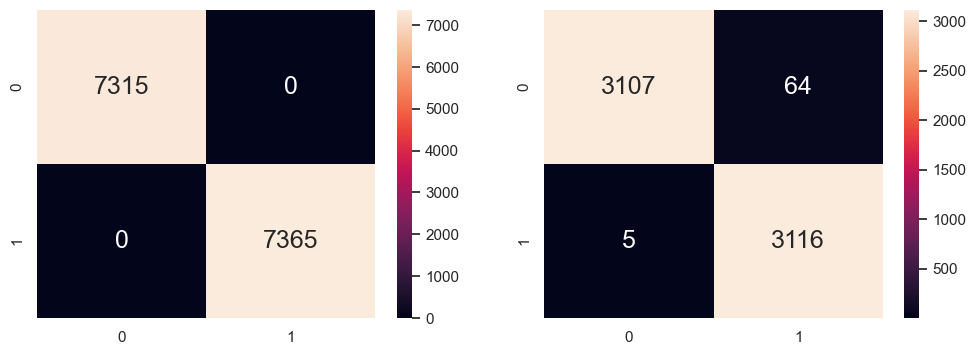

In [218]:
rf_y_train_pred = search.predict(X_train)

tn, fp, fn, tp = confusion_matrix(y_train, rf_y_train_pred).ravel()

print("For Training Data:")
print('Accuracy:', accuracy_score(y_train, rf_y_train_pred))
print('Precision:', precision_score(y_train, rf_y_train_pred))
print('Recall:', recall_score(y_train, rf_y_train_pred))
print('F1-Score:', f1_score(y_train, rf_y_train_pred))

rf_train_acc=accuracy_score(y_train, rf_y_train_pred)
rf_train_pre=precision_score(y_train, rf_y_train_pred)
rf_train_rec=recall_score(y_train, rf_y_train_pred)
rf_train_f1=f1_score(y_train, rf_y_train_pred)

# Calculate Sensitivity
sensitivity = tp / (tp + fn)

# Calculate Specificity
specificity = tn / (tn + fp)

print(f"Sensitivity: {sensitivity}")
print(f"Specificity: {specificity}")

print()


rf_y_test_pred = search.predict(X_test)

tn, fp, fn, tp = confusion_matrix(y_test, rf_y_test_pred).ravel()

print("For Test Data:")
print('Accuracy:', accuracy_score(y_test, rf_y_test_pred))
print('Precision:', precision_score(y_test, rf_y_test_pred))
print('Recall:', recall_score(y_test, rf_y_test_pred))
print('F1-Score:', f1_score(y_test, rf_y_test_pred))

rf_test_acc=accuracy_score(y_train, rf_y_train_pred)
rf_test_pre=precision_score(y_train, rf_y_train_pred)
rf_test_rec=recall_score(y_train, rf_y_train_pred)
rf_test_f1=f1_score(y_train, rf_y_train_pred)

# Calculate Sensitivity
sensitivity = tp / (tp + fn)

# Calculate Specificity
specificity = tn / (tn + fp)

print(f"Sensitivity: {sensitivity}")
print(f"Specificity: {specificity}")

f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, rf_y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, rf_y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
plt.show()

In [219]:
getsize(search)

10419923

In [82]:
joblib.dump(search, r"C:\Users\Admin\Desktop\Models\rf_new_model_3.joblib")

['C:\\Users\\Admin\\Desktop\\Models\\rf_new_model_3.joblib']

In [220]:
dt = DecisionTreeClassifier()

param_grid = {
    'max_depth': [None, 10, 50, 100],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

grid_search = HalvingGridSearchCV(estimator=dt, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1, scoring='f1')

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print('Best parameters found: ', best_params)
print('Best estimator found: ', best_estimator)

n_iterations: 4
n_required_iterations: 4
n_possible_iterations: 4
min_resources_: 543
max_resources_: 14680
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 72
n_resources: 543
Fitting 5 folds for each of 72 candidates, totalling 360 fits
----------
iter: 1
n_candidates: 24
n_resources: 1629
Fitting 5 folds for each of 24 candidates, totalling 120 fits
----------
iter: 2
n_candidates: 8
n_resources: 4887
Fitting 5 folds for each of 8 candidates, totalling 40 fits
----------
iter: 3
n_candidates: 3
n_resources: 14661
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best parameters found:  {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best estimator found:  DecisionTreeClassifier()


For Training Data:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0
Sensitivity: 1.0
Specificity: 1.0

For Test Data:
Accuracy: 0.9772727272727273
Precision: 0.9676507537688442
Recall: 0.987183595001602
F1-Score: 0.977319587628866
Sensitivity: 0.987183595001602
Specificity: 0.967518133081047



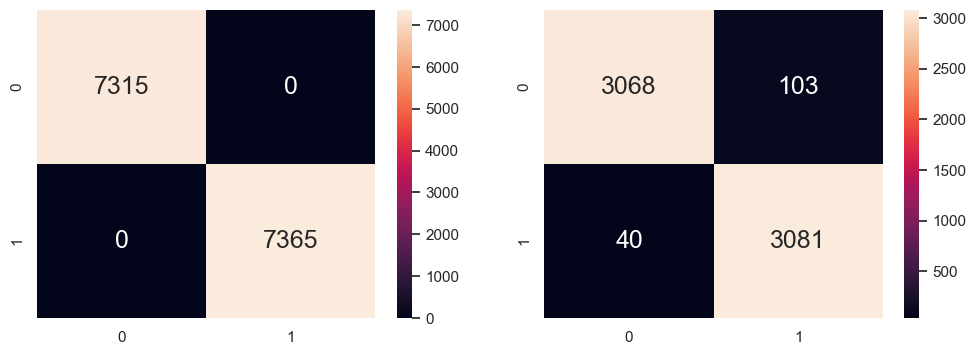

In [221]:
dt_y_train_pred = grid_search.predict(X_train)

tn, fp, fn, tp = confusion_matrix(y_train, dt_y_train_pred).ravel()

print("For Training Data:")
print('Accuracy:', accuracy_score(y_train, dt_y_train_pred))
print('Precision:', precision_score(y_train, dt_y_train_pred))
print('Recall:', recall_score(y_train, dt_y_train_pred))
print('F1-Score:', f1_score(y_train, dt_y_train_pred))

rf_train_acc=accuracy_score(y_train, dt_y_train_pred)
rf_train_pre=precision_score(y_train, dt_y_train_pred)
rf_train_rec=recall_score(y_train, dt_y_train_pred)
rf_train_f1=f1_score(y_train, dt_y_train_pred)

# Calculate Sensitivity
sensitivity = tp / (tp + fn)

# Calculate Specificity
specificity = tn / (tn + fp)

print(f"Sensitivity: {sensitivity}")
print(f"Specificity: {specificity}")

print()

dt_y_test_pred = grid_search.predict(X_test)

tn, fp, fn, tp = confusion_matrix(y_test, dt_y_test_pred).ravel()

print("For Test Data:")
print('Accuracy:', accuracy_score(y_test, dt_y_test_pred))
print('Precision:', precision_score(y_test, dt_y_test_pred))
print('Recall:', recall_score(y_test, dt_y_test_pred))
print('F1-Score:', f1_score(y_test, dt_y_test_pred))

rf_test_acc=accuracy_score(y_train, dt_y_train_pred)
rf_test_pre=precision_score(y_train, dt_y_train_pred)
rf_test_rec=recall_score(y_train, dt_y_train_pred)
rf_test_f1=f1_score(y_train, dt_y_train_pred)

# Calculate Sensitivity
sensitivity = tp / (tp + fn)

# Calculate Specificity
specificity = tn / (tn + fp)

print(f"Sensitivity: {sensitivity}")
print(f"Specificity: {specificity}")

print()

f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, dt_y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, dt_y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
plt.show()

In [222]:
getsize(grid_search)

68209

In [86]:
joblib.dump(grid_search, r"C:\Users\Admin\Desktop\Models\dt_new_model_3.joblib")

['C:\\Users\\Admin\\Desktop\\Models\\dt_new_model_3.joblib']

In [223]:
lgbm = LGBMClassifier()
parameters = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [6, 8, 10, 12, 14, 16, 18, 20, None],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.5, 0.7, 1],
    'colsample_bytree': [0.5, 0.7, 1],
}

hgs = HalvingGridSearchCV(lgbm, parameters, cv=5, scoring='f1', n_jobs=-1, verbose=2)

best_lgm_model = hgs.fit(X_train, y_train)

print('Best parameters:', best_lgm_model.best_params_)

n_iterations: 7
n_required_iterations: 7
n_possible_iterations: 7
min_resources_: 20
max_resources_: 14680
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 972
n_resources: 20
Fitting 5 folds for each of 972 candidates, totalling 4860 fits
----------
iter: 1
n_candidates: 324
n_resources: 60
Fitting 5 folds for each of 324 candidates, totalling 1620 fits
----------
iter: 2
n_candidates: 108
n_resources: 180
Fitting 5 folds for each of 108 candidates, totalling 540 fits
----------
iter: 3
n_candidates: 36
n_resources: 540
Fitting 5 folds for each of 36 candidates, totalling 180 fits
----------
iter: 4
n_candidates: 12
n_resources: 1620
Fitting 5 folds for each of 12 candidates, totalling 60 fits
----------
iter: 5
n_candidates: 4
n_resources: 4860
Fitting 5 folds for each of 4 candidates, totalling 20 fits
----------
iter: 6
n_candidates: 2
n_resources: 14580
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Best parameters: {'colsample_bytree': 0.7, 'l

For Training Data:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0
Sensitivity: 1.0
Specificity: 1.0

For Test Data:
Accuracy: 0.9903051493960585
Precision: 0.9820415879017014
Recall: 0.9987183595001602
F1-Score: 0.9903097696584591
Sensitivity: 0.9987183595001602
Specificity: 0.9820245979186376



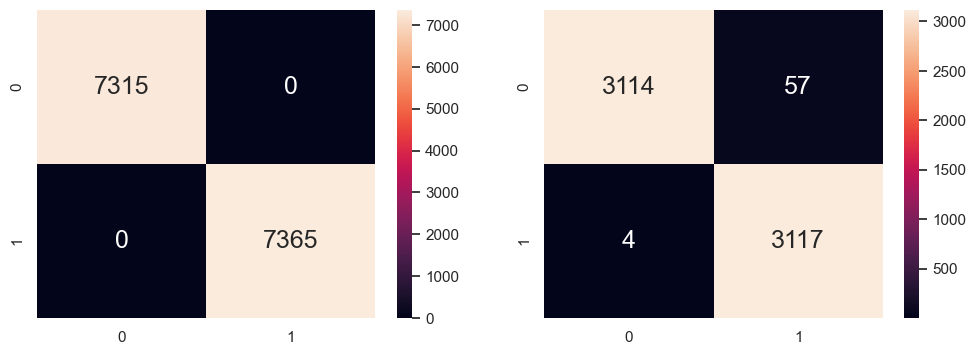

In [224]:
lgbm_y_train_pred = best_lgm_model.predict(X_train)

tn, fp, fn, tp = confusion_matrix(y_train, lgbm_y_train_pred).ravel()

print("For Training Data:")
print('Accuracy:', accuracy_score(y_train, lgbm_y_train_pred))
print('Precision:', precision_score(y_train, lgbm_y_train_pred))
print('Recall:', recall_score(y_train, lgbm_y_train_pred))
print('F1-Score:', f1_score(y_train, lgbm_y_train_pred))

# Calculate Sensitivity
sensitivity = tp / (tp + fn)

# Calculate Specificity
specificity = tn / (tn + fp)

print(f"Sensitivity: {sensitivity}")
print(f"Specificity: {specificity}")

print()

lgbm_y_test_pred = best_lgm_model.predict(X_test)

tn, fp, fn, tp = confusion_matrix(y_test, lgbm_y_test_pred).ravel()

print("For Test Data:")
print('Accuracy:', accuracy_score(y_test, lgbm_y_test_pred))
print('Precision:', precision_score(y_test, lgbm_y_test_pred))
print('Recall:', recall_score(y_test, lgbm_y_test_pred))
print('F1-Score:', f1_score(y_test, lgbm_y_test_pred))


# Calculate Sensitivity
sensitivity = tp / (tp + fn)

# Calculate Specificity
specificity = tn / (tn + fp)

print(f"Sensitivity: {sensitivity}")
print(f"Specificity: {specificity}")

print()

f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, lgbm_y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, lgbm_y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
plt.show()

In [225]:
getsize(best_lgm_model)

1030183

In [90]:
joblib.dump(best_lgm_model, r"C:\Users\Admin\Desktop\Models\lgm_new_model_3.joblib")

['C:\\Users\\Admin\\Desktop\\Models\\lgm_new_model_3.joblib']